<center><img alt="" src="images/Cover.jpg"/></center> 

## <center><font color="blue">Supervised Learning I: Korelasi, Regresi, dan Regresi Logistik</font></center>

<h2 id="(C)-Taufik-Sutanto---2019" style="text-align: center;">(C) Taufik Sutanto - 2019</h2>
<h2 id="tau-data-Indonesia-~-https://tau-data.id" style="text-align: center;">tau-data Indonesia ~ <a href="https://tau-data.id" target="_blank"><span style="color: #0009ff;">https://tau-data.id</span></a></h2>

# Notes and Disclaimer

* This notebook is part of the free (open knowledge) eLearning course at: https://tau-data.id/courses/
* Some images are taken from several resources, we respect those images ownerships and put a reference/citation from where it is originated. Nevertheless, sometimes we are having trouble to find the origin of the image(s). If you are the owner of the image and would like the image taken-out (or want the citation to be revised) from this open knowledge course resources please contact us here with the details: https://tau-data.id/contact/  
* Unless stated otherwise, in general tau-data permit its resources to be copied and-or modified for non-commercial purposes. With condition proper acknowledgement/citation is given.

## Outline:

* Pengantar ke Predictive Modelling
* Korelasi
* Regresi
* Evaluasi dan Interpretasi Model Regresi
* Regresi Logistik
* Evaluasi dan Interpretasi Model Klasifikasi

# Pendahuluan Model Regresi

* Digunakan saat variabel tak bebas (**Dependent variable** - Y) bertipe **numerik** (float/real) dan variabel bebasnya bisa numerik dan-atau kategorik

<p><img alt="" src="images/Supervised_Methods.png" /></p>


<p><img alt="" src="images/models_wrong_some_useful.png" /></p>

* Perfect/true-best model tidak ada, bahkan seringnya tidak diperlukan

# Beberapa contoh aplikasi regresi

1. **Predictive** Analytics: Memprediksi resiko, harga, penjualan, demand, dsb.

2. Operation Efficiency: Optimasi proses bisnis dengan melihat **hubungan antar variabel** dan mengambil policy berdasarkan hubungan tersebut.

3. Supporting Decisions: **Testing hypothesis**, misal terkait keuangan, operations dan customer purchases.

4. New **Insights**: Regresi dapat membantu menganalisa hubungan antar variabel dan sekaligus mem-filternya.

Sumber: https://www.newgenapps.com/blog/business-applications-uses-regression-analysis-advantages

# Regresi dan Korelasi

<p><img alt="" src="images/correlation_2.png" /></p>

# Regresi dan Korelasi

* Konsep dasar Persamaan/model Regressi adalah hubungan linear antara variabel bebas dan tak bebas.
* Sehingga kita akan awali bahasannya dengan Korelasi

<p><img alt="" src="images/correlation.png" /></p>


# Koefisien Korelasi Pearson

* Korelasi adalah suatu pengukuran untuk melihat **hubungan linier** antara dua variable numerik. Disimbolkan dengan **r**, untuk sampel, dan **$\rho$** untuk populasi.

* Langkah pertama dalam penentuan korelasi adalah dengan membuat **diagram pencar** (scatter plot) dari variabel terkait. Pada korelasi, kedua variable setara, dalam artian tidak ada yang menjadi variable bebas dan terikat. 

* Namun, untuk mempermudah pembahasan, pada diagram pencar, satu variable akan disimbolkan sebagai *x* (variable bebas) dan satu variable sebagai *y* (variable terikat/tak bebas). Jika titik – titik data terkonsentrasi di sekitar garis lurus, maka merupakan indikasi bahwa korelasi antara kedua variable tinggi. Makin terpencar data dari suatu garis lurus, menunjukkan makin rendah korelasi antara kedua variable tersebut.

# Nilai koefisien korelasi Pearson

* Nilai dari koefisien korelasi Pearson adalah dari -1 hingga +1.

<p><img alt="" src="images/korelasi_pearson_01.png" /></p>

<p><img alt="" src="images/linear-nonlinear-relationships.png" style="width: 688px; height: 266px;" /></p>

# Hati-hati

* Koefisien korelasi = 0 bukan berarti tidak ada hubungan antara kedua variable. Yang benar adalah: tidak ada hubungan LINIER, tapi bisa jadi ada hubungan dalam bentuk lain; misal: kuadratik, atau fungsi lain selain linier, seperti pada contoh di atas. 

# Memahami Korelasi dari perumusannya (Statistical Thinking)

* Korelasi sebenarnya adalah Covariance dibagi dengan masing-masing standar deviasinya.
* Apa maksud/maknanya?

<p><img alt="" src="images/korelasi_pearson_formulae.png" /></p>

# Contoh sederhana

<p><img alt="" src="img/data_korelasi_01.png" /></p>

In [1]:
# Importing Some Python Modules
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np, time
import warnings; warnings.simplefilter('ignore')
from sklearn.metrics import confusion_matrix, classification_report
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# un-command line below and run it "Only If" there is an error saying "factorial not known"
#!pip install statsmodels==0.10.0rc2 --pre
# Importing Modules
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats

%matplotlib inline
plt.style.use('bmh'); sns.set()

In [2]:
# ToyData Example
x = np.array([40, 45, 53, 60, 65, 71]) # Usia
y = np.array([126, 124, 135, 142, 139, 151]) # Tekanan Darah
np.corrcoef(x, y)
# Hasilnya adalah matriks korelasi

array([[1.        , 0.94676931],
       [0.94676931, 1.        ]])

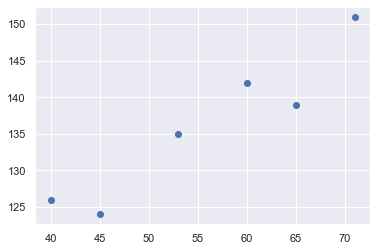

In [3]:
# Plot untuk melihat datanya
plt.scatter(x, y)
plt.show()

                   usia  Tekanan_Darah
usia           1.000000       0.946769
Tekanan_Darah  0.946769       1.000000


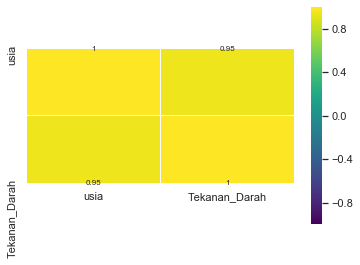

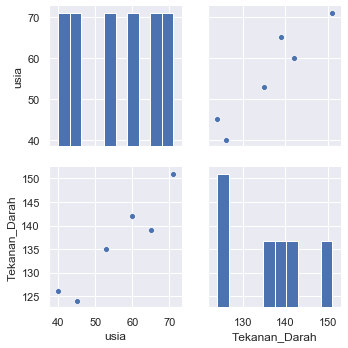

In [4]:
# cara lain dengan DataFrame
df = pd.DataFrame({'usia':x, 'Tekanan_Darah':y})
print(df.corr())
sns.heatmap(df.corr(),cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True)
p = sns.pairplot(df)

# Interpretasi

* Nilai ~0.95 menunjukkan bahwa ada korelasi linier positif yang kuat antara usia dan tekanan darah. Ada kecenderungan bahwa usia tinggi berkaitan dengan tekanan darah yang kebih tinggi dibandingkan usia rendah.
* **WARNING**
* **Korelasi tidak sama (meng-implikasikan) dengan sebab akibat**. Perhatikan interpretasi di atas. Tidak dinyatakan bahwa jika usia tinggi maka tekanan darah rendah, hanya suatu tren atau kecenderungan. Mungkin saja usia dengan bertambahnya usia maka tekanan darah meningkat, tapi mungkin juga tekanan darah tinggi bukan karena usia, tapi faktor lain yang tidak teramati pada data.

* Contoh lain penelitian di Machine learning (kecantikan dan confidence/Panjang Jari dan IQ)

# Batasan nilai $R^2$ seperti ini? ... Really? Why? Why not?

<p><img alt="" src="images/Corr_interpretation.png" /></p>
[image Source: https://spencermath.weebly.com/home/interpreting-the-correlation-coefficient]

* Cases (social, medicine, etc)
* Objective, prediction vs insights.

# Regresi Linier Sederhana


<img alt="" src="images/Reg_sederhana_01.png"/>

<p><img alt="" src="images/reg_eq.png" style="width: 599px; height: 249px;" /></p>

<p><img alt="" src="images/reg_types.png" /></p>

[image source: https://www.slideshare.net/mahakvijay3/basics-of-regression-analysis]

<p><img alt="" src="images/Regression_FlowChart.jpg" /></p>

[image Source: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html]

# Korelasi ke Regresi

<p><img alt="" src="images/korelasi_2_regresi.png" /></p>

# Diskusi

* Mengapa Error diasumsikan berdistribusi normal?
* Error VS Residual?
* Di dunia nyata kita seringnya tidak mengetahui error. Loh kok? Maksudnya?
* Apa beda regresi dan interpolasi di Metode Numerik?

# Bahas sebentar pentingnya memahami "Loss Function"

* Persamaan/Model Linier adalah dasar terpenting di Statistika, Data Science, Machine Learning, dan Deep Learning (*).
* Banyak model di (*) sebenarnya adalah fungsi linier, bahkan di masalah klasifikasi.
* Yang membedakan adalah "pemodelan/optimasi masalah/Loss Functionnya"

-- Keterangan lebih lanjut ... 

# Heteroskedasticity

<p><img alt="" src="img/heterokedastisitas.png" /></p>


# Regresi memprediksi rata-rata $y_i$ untuk $x_i$, maksudnya?

<h1 id="Asumsi-Klasik">Asumsi Klasik</h1>

* https://tau-data.id/asumsi-statistika-benci-butuh/
<p><img alt="" src="images/asumsi_reg.png" style="width: 800px; height: 298px;" /></p>

<p><img alt="" src="images/asumsi_reg_2.png" /></p>


# Some warnings in Regression

<p><img alt="" src="images/Warnings_on_Regresi.png" /></p>

# Multikolinearitas: Mengapa dan seberapa "robust"?

## Kapan kita tidak perlu hawatir tentang hal ini?

# Pembahasan tentang Scaling

# Pembahasan tentang Interpolasi dan bukan Ekstrapolasi 

## Kalau mau ekstrapolasi bagaimana?

# Bagaimana jika error tidak berdistribusi "normal"?

# Evaluasi Error (Mean Squared Error)

<p><img alt="" src="images/mse_regresi.png" /></p>

* Hati-hati,... perhatikan rumusnya dengan baik .... ia tidak robust terhadap outlier
* $\hat{y} = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n$
* MSE = total jarak/selisih antara prediksi dan nilai dari data (sesungguhnya)
* RMSE = $\sqrt{MSE}$   ... why? 
* Evaluasi penting ketika kita ingin melakukan prediksi

# Evaluasi $R^2$: Model VS Tidak Pakai Model?

<p><img alt="" src="images/R_Square.png" /></p>

# Adjusted R-Squared? Why?

<p><img alt="" src="images/Adjusted_R_Squared.png" /></p>

# Pengaruh Variabel Tak Bebas ke Model


<p><img alt="" src="images/sig_var_di_Regresi.png" /></p>

* $SSR = SST - SSE = \sum{(y_i-\bar{y})^2} - \sum{(y_i-\hat{y_i})^2}$  

# p-value (bergantung distribusi; contoh kasus distribusi normal)?

<p><img alt="" src="images/p-value.png" /></p>

* Probabilitas membuat kesalahan
* Dari rumus di cell sebelumnya, ada "masalah" dengan formulasi p-value.

# Menangani Data Kategorik di Regresi

1. Numeric Encoding
2. Dummy variable encoding
3. One-Hot Encoding

In [5]:
# Contoh Data

dt = [['female', 'New York', 'low', 4], ['female', 'London', 'medium', 3], ['male', 'New Delhi', 'high', 2]]
col = ['Gender', 'City', 'Temperature', 'Rating']

In [6]:
data = pd.DataFrame(dt,columns=col)
print(data)

   Gender       City Temperature  Rating
0  female   New York         low       4
1  female     London      medium       3
2    male  New Delhi        high       2


# Numeric encoding

* Lebih cocok untuk ordinal (terutama jika kategorinya cukup banyak)

In [7]:
data['City_encoded'] = LabelEncoder().fit_transform(data['City'])
data.head()
# Hati-hati tidak ada urutan encodingnya, cocok untuk variabel nominal

,Gender,City,Temperature,Rating,City_encoded
0,female,New York,low,4,2
1,female,London,medium,3,0
2,male,New Delhi,high,2,1


# Customized Ordinal Numeric Encoding

In [8]:
mapping = {'low':0, 'medium':1, 'high':2}
data['Temperature_encoded'] = data['Temperature'].map(mapping)
data.head()

,Gender,City,Temperature,Rating,City_encoded,Temperature_encoded
0,female,New York,low,4,2,0
1,female,London,medium,3,0,1
2,male,New Delhi,high,2,1,2


# One-hot encoding

* Preferable in Machine learning community
* Variabel nominal

In [9]:
Oh = pd.get_dummies(data['City'], prefix='City')
Oh
# Perhatikan, sekarang setiap kategori di variabel kategorik menjadi sebuah variabel baru
# tapi bagaimana memasukan hasil encoding ini kembali ke datanya?

,City_London,City_New Delhi,City_New York
0,0,0,1
1,1,0,0
2,0,1,0


In [10]:
dt = pd.concat([data, Oh], axis=1)
dt.head()

,Gender,City,Temperature,Rating,City_encoded,Temperature_encoded,City_London,City_New Delhi,City_New York
0,female,New York,low,4,2,0,0,0,1
1,female,London,medium,3,0,1,1,0,0
2,male,New Delhi,high,2,1,2,0,1,0


# Dummy Variable (Statisticians)

* less parameter
* konsepnya seperti "binary system"
* Statistician tidak suka jika jumlah parameter berlebih
* default encoding beberapa modul

In [11]:
dum = pd.get_dummies(data['City'], prefix='City', drop_first=True)
dum.head()

,City_New Delhi,City_New York
0,0,1
1,0,0
2,1,0


In [12]:
pd.concat([data, dum], axis=1)

,Gender,City,Temperature,Rating,City_encoded,Temperature_encoded,City_New Delhi,City_New York
0,female,New York,low,4,2,0,0,1
1,female,London,medium,3,0,1,0,0
2,male,New Delhi,high,2,1,2,1,0


# Regresi Non-Linier?

## Why?
## Kapan tidak disarankan menambah kompleksitas model?
## Regression for insights VS regression for prediction.

## Masih linear terhadap parameter

<p><img alt="" src="images/linearisasi_regresi.png" /></p>
[image source: https://sites.google.com/site/apphysics1online/appendices/2-data-analysis/graph-linearization ]

# Pentingnya "scaling" di Regresi (atau clustering) untuk mencari insight dari data

<p><img alt="" src="images/scaling.png" /></p>

<p><img alt="" src="images/standardize.png" /></p>
<p><img alt="" src="images/minmax.png" /></p>

[image source: https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e ]

# Floating Point tidak sama dengan Bilangan Real

## Komputer tidak bisa menyimpan dan mengolah bilangan real
# Tidak Percaya?
## Mari hitung deret berikut dengan komputer (Python)
# $\sum_{n=1}^{10^6}0.1$
## Seharusnya hasilnya adalah?

In [13]:
# Here is the result according to Python
dSum = 0 
for i in range(10**6): # ini artinya for i dari 0 sampai (10^6)-1
    dSum = dSum + 0.1 # or "dSum += 0.1"
print(dSum)
# is the result correct? Why?

100000.00000133288


# Sistem Floating Point

<p><img alt="" src="images/6_float_3.png" /></p>

# Studi Kasus

* Automotive MPG (miles-per-Galon) Data Set : https://archive.ics.uci.edu/ml/datasets/Auto+MPG
* Paper awal: Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann. 

Attribute Information:

1. **mpg**: continuous ==> Dependent/target variable
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)

In [14]:
# Contoh
# Load DataFile CSV
try:
    df = pd.read_csv('data/iklan.csv') # run locally
except:
    !wget https://raw.githubusercontent.com/taufikedys/tau-data/master/data/iklan.csv # "Google Colab"
    df = pd.read_csv('iklan.csv') 
df.head()

,No,Iklan,Laba,Tipe
0,1,10,9.17,1
1,2,1,1.32,0
2,3,12,8.54,1
3,4,12,7.68,1
4,5,5,7.15,1


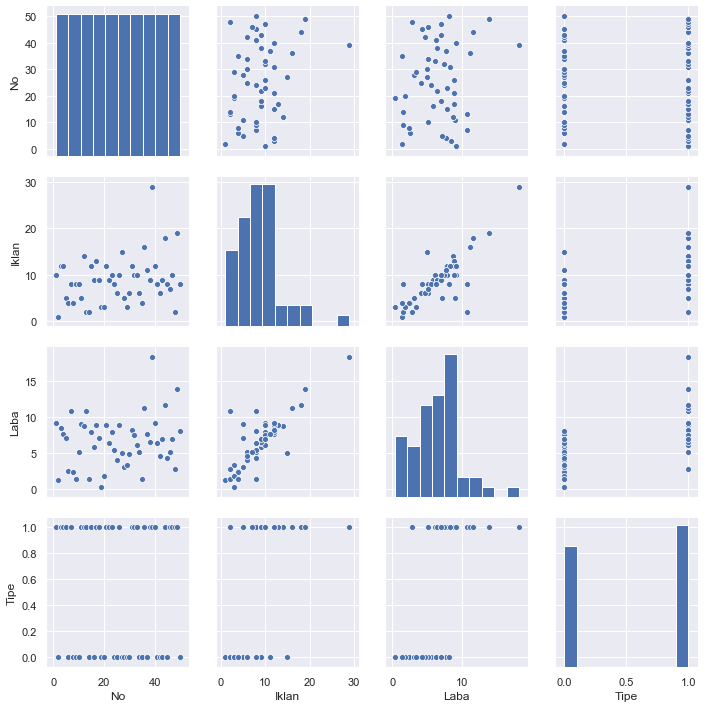

In [15]:
p = sns.pairplot(df)

In [16]:
standardize = preprocessing.StandardScaler()
minMax = preprocessing.MinMaxScaler()

In [17]:
st = standardize.fit_transform(df[['Iklan', 'Laba']]) # Harus numerik dan Tidak Boleh ada Null/missing values
st # hasilnya Numpy Array

array([[ 0.23119499,  0.74796056],
       [-1.56255927, -1.51849911],
       [ 0.62980705,  0.56606635],
       [ 0.62980705,  0.31776631],
       [-0.76533515,  0.16474419],
       [-0.96464118, -1.16625951],
       [-0.16741706,  1.2330118 ],
       [-0.96464118, -1.20956766],
       [-0.16741706, -1.46652933],
       [-0.16741706, -0.41847218],
       [-0.76533515,  0.72197568],
       [ 1.02841911,  0.63247217],
       [-1.36325324,  1.2330118 ],
       [-1.36325324, -1.46941654],
       [ 0.62980705,  0.38705934],
       [ 0.03188896, -0.20481866],
       [ 0.82911308,  0.69021637],
       [ 0.03188896,  0.14164651],
       [-1.16394721, -1.80722008],
       [-1.16394721, -1.3683642 ],
       [ 0.62980705,  0.69021637],
       [ 0.03188896, -0.05757096],
       [ 0.23119499,  0.37262329],
       [-0.16741706, -0.30875821],
       [-0.56602912, -0.72451642],
       [ 0.23119499,  0.67866753],
       [ 1.22772514, -0.4531187 ],
       [-0.76533515, -1.00168856],
       [-1.16394721,

In [18]:
# Jika ingin dimasukkan lagi ke Dataframe awal
st_df = pd.DataFrame(st, columns=['Iklan', 'Laba']) # Merubah Numpy Array menjadi DataFrame
df2 = pd.concat([df, st_df], axis=1) # caranya sama dengan saat kita mendiskusikan encoding variabel kategorik
df2.head()

,No,Iklan,Laba,Tipe,Iklan,Laba
0,1,10,9.17,1,0.231195,0.747961
1,2,1,1.32,0,-1.562559,-1.518499
2,3,12,8.54,1,0.629807,0.566066
3,4,12,7.68,1,0.629807,0.317766
4,5,5,7.15,1,-0.765335,0.164744


In [19]:
# Similary untuk minMax
mm = minMax.fit_transform(df[['Iklan', 'Laba']])
mm_df = pd.DataFrame(mm, columns=['iklan_mm', 'laba_mm']) # Merubah Numpy Array menjadi DataFrame
df3 = pd.concat([df, mm_df], axis=1) # caranya sama dengan saat kita mendiskusikan encoding variabel kategorik
df3.head()

,No,Iklan,Laba,Tipe,iklan_mm,laba_mm
0,1,10,9.17,1,0.321429,0.492214
1,2,1,1.32,0,0.000000,0.055617
2,3,12,8.54,1,0.392857,0.457175
3,4,12,7.68,1,0.392857,0.409344
4,5,5,7.15,1,0.142857,0.379867


# Contoh Regresi di Python (Data Pengeluaran Biaya Iklan)

In [20]:
# Load DataFile CSV
try:
    df = pd.read_csv('data/iklan.csv') # run locally
except:
    !wget https://raw.githubusercontent.com/taufikedys/tau-data/master/data/iklan.csv # "Google Colab"
    df = pd.read_csv('iklan.csv') 
df.head()

,No,Iklan,Laba,Tipe
0,1,10,9.17,1
1,2,1,1.32,0
2,3,12,8.54,1
3,4,12,7.68,1
4,5,5,7.15,1


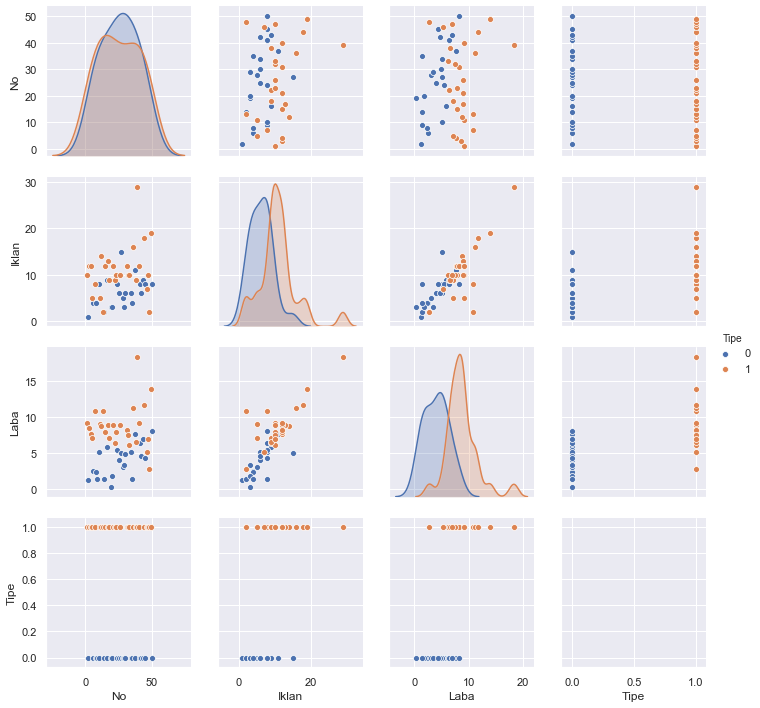

In [21]:
p = sns.pairplot(df, hue="Tipe")

In [22]:
df.drop("No", axis=1, inplace=True)
df.dtypes

Iklan      int64
Laba     float64
Tipe       int64
dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
Iklan    50 non-null int64
Laba     50 non-null float64
Tipe     50 non-null int64
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [24]:
df.describe()

,Iklan,Laba,Tipe
count,50.000000,50.000000,50.000000
mean,8.840000,6.579400,0.540000
std,5.068349,3.498715,0.503457
min,1.000000,0.320000,0.000000
25%,5.250000,4.412500,0.000000
50%,8.500000,6.735000,1.000000
75%,11.750000,8.712500,1.000000
max,29.000000,18.300000,1.000000


In [25]:
# Fitting model Regresi Sederhana
lm = smf.ols("Laba ~ Iklan", data=df[['Laba','Iklan']]).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Laba   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     86.88
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           2.40e-12
Time:                        04:27:14   Log-Likelihood:                -107.23
No. Observations:                  50   AIC:                             218.5
Df Residuals:                      48   BIC:                             222.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6818      0.604      2.784      0.008       0.467       2.897
Iklan          0.5540      0.059      9.321      0.000       0.435       0.674
==============================================================================
Omnibus:                       20.767   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.916
Skew:                           1.100   Prob(JB):                     1.07e-10
Kurtosis:                       7.147   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Mean Squared Error
lm.mse_total

12.241009836734694

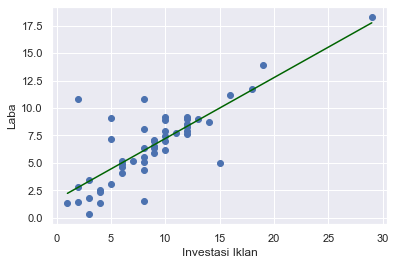

In [27]:
# Perintah-perintah ini hanya untuk memplot hasilnya
xmin, xmax = df.Iklan.min(), df.Iklan.max()
X = np.linspace(xmin, xmax, 100)
# params[0] is the intercept (beta0)
# params[1] is the slope (beta1)
Y = lm.params[0] + lm.params[1] * X
# Perhatikan ada 2 perintah plot
plt.plot(df.Iklan, df.Laba, "o")
plt.plot(X, Y, color="darkgreen")
#Selanjutnya hanya perintah labelling
plt.xlabel("Investasi Iklan")
plt.ylabel("Laba")
plt.show()

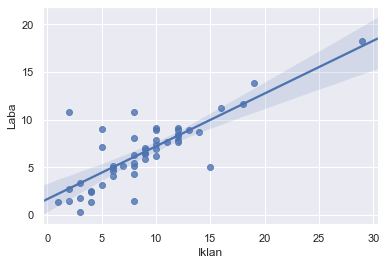

In [28]:
# Menggunakan Module "SeaBorn" jauh lebih mudah ketimbang MatplotLib
p = sns.regplot(df.Iklan, df.Laba)

In [29]:
# Kita bisa prediksi dengan cara seperti ini:
lm.predict({'Iklan': [21, 23, 25]})

0    13.316372
1    14.424426
2    15.532481
dtype: float64

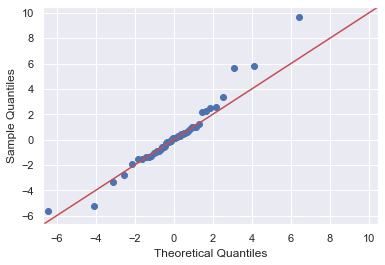

In [30]:
# Kenormalan residuals
res = lm.resid # residuals
fig = sm.qqplot(res, stats.t, fit=True, line='45')
plt.show()

In [31]:
# Regresi Berganda dengan menambahkan variabel kategorik "Tipe"
res = ols(formula='Laba ~ Iklan + C(Tipe)', data=df).fit()
res.summary()
# Perhatikan bentuk modelnya, terutama pada data kategorik

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Laba   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     74.01
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           3.00e-15
Time:                        04:27:16   Log-Likelihood:                -97.488
No. Observations:                  50   AIC:                             201.0
Df Residuals:                      47   BIC:                             206.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.3345      0.508      2.628      0.012       0.313       2.356
C(Tipe)[T.1]     2.6627      0.563      4.733      0.000       1.531       3.794
Iklan            0.4307      0.056      7.707      0.000       0.318       0.543
==============================================================================
Omnibus:                       12.079   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.276
Skew:                           0.939   Prob(JB):                      0.00131
Kurtosis:                       4.688   Cond. No.                         23.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Regresi Berganda non-linear (mencoba transformasi logaritmik)
res = ols(formula='Laba ~ np.log(Iklan) + C(Tipe)', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Laba   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           6.72e-12
Time:                        04:27:16   Log-Likelihood:                -105.69
No. Observations:                  50   AIC:                             217.4
Df Residuals:                      47   BIC:                             223.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.5655      0.951     -0.595      0.555      -2.479       1.348
C(Tipe)[T.1]      3.1226      0.653      4.783      0.000       1.809       4.436
np.log(Iklan)     2.7286      0.501      5.443      0.000       1.720       3.737
==============================================================================
Omnibus:                       17.831   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.549
Skew:                           1.249   Prob(JB):                     7.70e-06
Kurtosis:                       5.251   Cond. No.                         8.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Train-Test untuk menghindari Overfit

* Konsepnya generalisasi/"inferensi" Sample ==> Populasi, logical thinkingnya di aplikasi dunia nyata kita tidak memiliki nilai "y" (variabel target) yang sesungguhnya.
* Catatan: pemisahan train-test menjaga proporsi kategori pada masalah klasifikasi (tidak murni random atau split)

<p><img alt="" src="img/train_test.png" /></p>

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df[['Iklan', 'Tipe']], df['Laba'], test_size=0.4)

In [34]:
X_train.head()

,Iklan,Tipe
13,2,0
40,8,0
3,12,1
41,6,0
19,3,0


# Belum Dibahas:

* Model Regresi lain: Regression-tree, Support Vector Regression, Neural Network for Regression, dll.
* Regresi untuk data khusus, misal Ridge Regression jika jumlah variabel banyak
* General Linear Model dengan interaksi yang lebih umum/kompleks, dsb

# Selingan

* Pada penelitian sebaiknya menggunakan data public (open source) atau data private (misal data dari Rumah Sakit/Kampus)?

# Pendahuluan Klasifikasi 

<p><img alt="" src="images/masalah_klasifikasi.png" /></p>

* Misal diberikan permasalahan terdapat dua buah kategori orange dan ungu seperti di gambar.
* Setiap titik di ganmbar adalah entitas dari data yang terdiri dari beberapa variabel.
* Jika diberikan titik baru (warna putih), maka masalah klasifikkasi adalah kemudian menggolongkan data baru ini ke kategori titik Orange atau Ungu.


# Klasifikasi dengan Model Regresi Logistik

<p><img alt="" src="images/klas_regLogistik.png" /></p>

* Mencari garis lurus yang sedemikian sehingga kesalahan prediksinya sekecil mungkin (lihat gambar)

# Regresi Logistik

* Awalnya regresi logistik adalah metode klasifikasi binary: membedakan antara 2 kelas atau kategori.
* Masalah klasifikasi binary contohnya memprediksi seseorang terkena "kanker" atau "tidak kanker", kanker jinak/ganas, fraud atau bukan fraud (pada transaksi keuangan), negatif/positif dalam sentimen analisis, dsb.
* Regresi logistik adalah pengembangan dari model regresi liniear, namun di konversi ke masalah klasifikasi.

## Regresi Logistik

<img alt="" src="images/reg_to_log.png" />

* http://www.saedsayad.com/logistic_regression.htm
* Makna fungsi logarithm?
* Konsekuensi dari rumus $\beta$ diatas?
* Asumsi?

# Kaitan Regresi Logistik dan Neural Network/Deep Learning

<img alt="" src="images/logReg_NN_DL.png" />

<img alt="" src="images/Fungsi_Sigmoid.png" />

## Logistic Linear Regression

<p><img alt="" src="images/LogReg_When2use.png" /></p>


# Over Fitting?


<p><img alt="" src="images/under-over_Fitting.jpg" /></p>

<p><img alt="" src="images/sweet_spot.png" /></p>

<h2 id="Regularization">Regularization</h2>

* Misal $\beta$ ==> $w$
* Di perumusan regresi logistik awal, ada kemungkinan beta akan selalu positif dan besar (walau mungkin variabelnya kurang/tidak signifikan menerangkan variabel target ~ y).
* Untuk mencegah hal ini (~over fitting), model supervised learning (klasifikasi) menggunakan teknik regulerisasi.
* Konsep Regularisasi tidak hanya digunakan dalam regresi logistik, namun juga model lain seperti SVM, JST, Deep Learning, dll.
* Memahami konsep ini akan sangat bermanfaat di Data Science.
* Misal E(w) adalah fungsi error/loss function yang sudah kita sebelumnya dan $t_n$ adalah nilai sesungguhnya, maka regulerisasi dilakukan dengan mengoptimalkan fungsi berikut ini:

<p><img alt="" src="images/L2_regularization_LogReg.png" /></p>

# Diskusi

* Regresi Logistik tidak dapat mengolah data yang mengandung "missing values"/null, mengapa?
* Jika kita merubah persamaannya (misal dengan mencoba berbagai transformasi variabel) sedemikian sehingga didapatkan model yang sedikit lebih baik (akurasinya) dibandingkan model yang lebih sederhana, apakah kita akan menggunakan model tersebut? Mengapa?
* Seperti regresi linear, apakah kita perlu standarisasi/scaling data?

# Contoh Aplikasi

* Data klasifikasi bunga Iris sebagai studi kasus sederhana
* Link data: https://archive.ics.uci.edu/ml/datasets/iris
* Paper sumber data: Fisher,R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950). 
* Masalah klasifikasinya adalah mengklasifikasikan jenis Bunga Iris berdasarkan bentuk (e.g. panjang dan lebar) bunga.

In [35]:
try:
    df = pd.read_excel('data/iris.xls', sheet_name='Sheet1')# Load "sheet_1" di Excell
except:
    !wget https://github.com/taufikedys/tau-data/blob/master/data/iris.xls # "Google Colab"
    df = pd.read_excel('iris.xls', sheet_name='Sheet1')

df.info()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SPECIES     150 non-null int64
SEPALLEN    150 non-null float64
SEPALWID    150 non-null float64
PETALLEN    150 non-null float64
PETALWID    150 non-null float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [36]:
df.head()

,SPECIES,SEPALLEN,SEPALWID,PETALLEN,PETALWID
0,1,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,1,4.7,3.2,1.3,0.2
3,1,4.6,3.1,1.5,0.2
4,1,5.0,3.6,1.4,0.2


In [37]:
df.describe()

,SPECIES,SEPALLEN,SEPALWID,PETALLEN,PETALWID
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,5.843333,3.057333,3.758000,1.199333
std,0.819232,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,6.400000,3.300000,5.100000,1.800000
max,3.000000,7.900000,4.400000,6.900000,2.500000


In [38]:
# Data ini bukan murni Binary Classification
# Kita akan ambil sebagiannya untuk menjadikannya masalah binary classification
print(set(df['SPECIES'].values))
# Bentuk data binary dari sini menggunakan teknik di Modul 03: EDA
# Disimpan dalam variabel baru "df_bin"
df_bin = df[df["SPECIES"].isin([1,2]) ]
set(df_bin['SPECIES'].values)

{1, 2, 3}


{1, 2}

In [39]:
df_bin.sample(7)

,SPECIES,SEPALLEN,SEPALWID,PETALLEN,PETALWID
69,2,5.6,2.5,3.9,1.1
45,1,4.8,3.0,1.4,0.3
56,2,6.3,3.3,4.7,1.6
4,1,5.0,3.6,1.4,0.2
87,2,6.3,2.3,4.4,1.3
17,1,5.1,3.5,1.4,0.3
59,2,5.2,2.7,3.9,1.4


# Pisahkan menjadi training dan Test Data seperti sebelumnya

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_bin[['SEPALLEN', 'SEPALWID','PETALLEN','PETALWID']], df_bin['SPECIES'], test_size=0.5, random_state=99)
print(X_train.shape, X_test.shape)

(50, 4) (50, 4)


# Pemodelan Regresi Logistik menggunakan Python (module SciKit-Learn)

In [41]:
clf = LogisticRegression().fit(X_train, y_train)

# Prediksi ke data Test

In [42]:
y_reglog = clf.predict(X_test)
y_reglog

array([1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 2, 1, 2], dtype=int64)

# Seberapa "baik" prediksi ini? = Akurasi/Evaluasi Model

In [43]:
accuracy_score(y_test, y_reglog)

1.0

# contoh data lain: Data Klasifikasi Kanker

* Dapat diunduh dari link ini: https://goo.gl/U2Uwz2
* Link scikit utk datanya: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [44]:
data = load_breast_cancer()
print(type(data))
X = data.data
print(type(X), X.shape)
X[:3]

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'> (569, 30)


array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [45]:
Y = data.target
print(type(Y), Y.shape)
print(data.target_names)
Y[-10:]

<class 'numpy.ndarray'> (569,)
['malignant' 'benign']


array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=99)
print(X_train.shape, X_test.shape)

(284, 30) (285, 30)


In [47]:
clf = LogisticRegression().fit(X_train, y_train)
y_reglog = clf.predict(X_test)
accuracy_score(y_test, y_reglog)
# Masih "mudah", namun lebih baik dari sebelumnya

0.9754385964912281

In [48]:
# Persamaannya? (ada 30 variabel)
clf.coef_

array([[ 1.39087585e+00,  4.87391375e-02,  1.08248977e-01,
        -5.22077161e-04, -8.09420510e-02, -2.25680667e-01,
        -3.78809787e-01, -1.75747947e-01, -9.96497778e-02,
        -1.07105465e-02,  1.63151800e-02,  8.82182707e-01,
        -9.95324166e-02, -8.45309307e-02, -9.06870392e-03,
        -1.21163808e-02, -6.42863774e-02, -3.19939557e-02,
        -2.39729145e-03, -1.00618313e-03,  1.42771591e+00,
        -2.95138123e-01, -2.17749186e-01, -2.46093085e-02,
        -1.51970973e-01, -7.94138700e-01, -1.18257011e+00,
        -4.00056929e-01, -2.56319754e-01, -9.34061015e-02]])

# Metric Evaluasi yang lain

<p><img alt="" src="images/6_Evaluasi_ML.JPG" /></p>

## http://scikit-learn.org/stable/modules/model_evaluation.html

<h2 id="Confusion-Matrix">Confusion Matrix</h2>

<p><img alt="" src="images/confusion_matrix.png" /></p>

<ul>
	<li>sensitivity, recall, hit rate, or true positive rate (TPR)</li>
	<li>precision or positive predictive value (PPV)</li>
</ul>

[image source: https://en.wikipedia.org/wiki/Confusion_matrix ]

<p><img alt="" src="images/FP-FN_Meme.jpg" /></p>

[image source: https://communitymedicine4asses.com/2014/04/01/fooled-type-i-error-and-type-ii-error/ ]

<p><img alt="" src="images/ex-F1-Score.png" /></p>
* Yang mana kategori yang "positif"?

<p><img alt="" src="images/F-beta-Score.png" /></p>

* $0\leq F\leq 1$, 1 optimal value
* $0\leq\beta< \inf$
* beta < 1 lends more weight to precision, 
* beta > 1 favors recall 
* beta -> 0 considers only precision 
* beta -> inf only recall

# Aplikasi di Python untuk metrics diatas:

In [49]:
print('presisi = ', precision_score(y_test, y_reglog))
print('Recall = ', recall_score(y_test, y_reglog))
print('f1_score = ', f1_score(y_test, y_reglog))

presisi =  0.994475138121547
Recall =  0.967741935483871
f1_score =  0.9809264305177111


# Atau

In [50]:
print(confusion_matrix(y_test, y_reglog))
print(classification_report(y_test, y_reglog))

[[ 98   1]
 [  6 180]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        99
           1       0.99      0.97      0.98       186

    accuracy                           0.98       285
   macro avg       0.97      0.98      0.97       285
weighted avg       0.98      0.98      0.98       285



# AUC (Area Under The Curve) ROC (Receiver Operating Characteristics)

<img alt="" src="images/roc_curves.svg" />

[image Source : https://frnsys.com/ai_notes/machine_learning/model_selection.html ]

Read More:
* https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
* https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

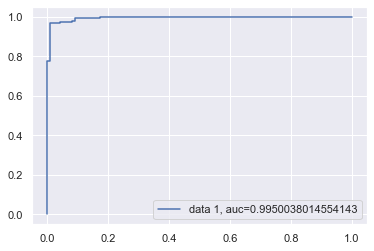

In [51]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Evaluasi yang kita lakukan belum cukup valid/objektif ... Mengapa?

<h1>Cross Validation</h1>

<img alt="" src="images/6_Cross_validation.png" />

In [52]:
# Cross validation
# Perhatikan variabelnya, kita sekarang menggunakan seluruh data
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
mulai = time.time()
scores_regLog = cross_val_score(clf, X, Y, cv=10) # perhatikan sekarang kita menggunakan seluruh data
waktu = time.time() - mulai
# Interval Akurasi 95 CI 
print("Accuracy Regresi Logistik: %0.2f (+/- %0.2f), Waktu = %0.3f detik" % (scores_regLog.mean(), scores_regLog.std() * 2, waktu))

Accuracy Regresi Logistik: 0.95 (+/- 0.04), Waktu = 0.064 detik


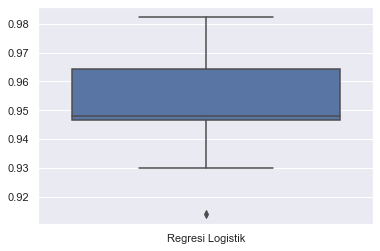

In [53]:
df = pd.DataFrame({'Regresi Logistik':scores_regLog})
sns.boxplot(data=df)
plt.show()

# Regresi Logistik untuk Multiclass Classification?

## Salah satu caranya: One Versus All (OVA) Approach

<p><img alt="" src="images/ova.png" /></p>

## Aplikasi di Python?

In [54]:
X, y = load_iris(return_X_y=True)
set(y) # 3 Kategori

{0, 1, 2}

In [55]:
X.shape # 4 variabel, 150 baris

(150, 4)

In [56]:
clf = LogisticRegression(multi_class='ovr').fit(X, y)
clf.coef_
# Perhatikan ada 3 persamaan

array([[ 0.41021713,  1.46416217, -2.26003266, -1.02103509],
       [ 0.4275087 , -1.61211605,  0.5758173 , -1.40617325],
       [-1.70751526, -1.53427768,  2.47096755,  2.55537041]])

# <center><font color="blue"> End of Module Korelasi-Regresi-Logistik

<hr />
<img alt="" src="images/meme_04_regression.png"/>